In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dfs=pd.read_excel('D:\Documentos\Github\Prueba_tecnica_Azzorti\datos\BASES_MODELO.xlsx',sheet_name=None)

In [4]:
df_bases_variables=dfs['BASE_VARIABLES']
df_bases_estimados=dfs['BASE_ESTIMADOS']
df_bases_asesoras=dfs['BASE_ASESORA']
def union(df1,df2,columnaunion=""):
    common=[]
    for i in df1.columns:
        if i in df2.columns:
            common.append(i)
    if columnaunion:
        df_merge=df1.merge(df2,how="inner",on=columnaunion)   
    else:
        df_merge=df1.merge(df2,how="inner",on=common)
    return df_merge
df=union(df_bases_variables,df_bases_estimados)
df=union(df,df_bases_asesoras)
df["CAMPANA"].unique()

array([201902, 201908, 201910, 201907, 201903, 201906, 201905, 201912,
       201904, 201911, 201909, 201901], dtype=int64)

# **EDA**


## **Paso 1: Inspeccion Basica de los datos**

In [5]:
# Paso 1: Inspeccion Basica de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CAMPANA               5817 non-null   int64 
 1   CODIGO_DEL_PRODUCTO   5817 non-null   object
 2   VENTA                 5817 non-null   int64 
 3   VENTA_ZONA_101        5817 non-null   int64 
 4   VENTA_ZONA_102        5817 non-null   int64 
 5   VENTA_ZONA_103        5817 non-null   int64 
 6   VENTA_ZONA_104        5817 non-null   int64 
 7   VENTA_ZONA_107        5817 non-null   int64 
 8   VENTA_ZONA_109        5817 non-null   int64 
 9   VENTA_ZONA_110        5817 non-null   int64 
 10  VENTA_ZONA_111        5817 non-null   int64 
 11  VENTA_ZONA_112        5817 non-null   int64 
 12  VENTA_ZONA_115        5817 non-null   int64 
 13  VENTA_ZONA_116        5817 non-null   int64 
 14  VENTA_ZONA_119        5817 non-null   int64 
 15  NOMB_SUBGRUPO         5817 non-null   

In [6]:
#resumen estadisitco de los datos
print(f"Datos numericos: \n:{df.describe()}")
print(f"Datos Categroticos: \n: {df.describe(include=['O'])}")


Datos numericos: 
:             CAMPANA         VENTA  VENTA_ZONA_101  VENTA_ZONA_102  \
count    5817.000000   5817.000000     5817.000000     5817.000000   
mean   201906.420148   3590.018566      130.017019      104.457796   
std         3.308766   3332.512574      185.582451      136.130799   
min    201901.000000     25.000000        0.000000        0.000000   
25%    201904.000000   1428.000000        0.000000        0.000000   
50%    201906.000000   2639.000000       76.000000       64.000000   
75%    201909.000000   4620.000000      178.000000      152.000000   
max    201912.000000  34645.000000     4001.000000     1588.000000   

       VENTA_ZONA_103  VENTA_ZONA_104  VENTA_ZONA_107  VENTA_ZONA_109  \
count     5817.000000     5817.000000     5817.000000     5817.000000   
mean        85.258037       41.903559       82.692969       73.810727   
std        169.428516       68.880400      152.490673      132.110460   
min          0.000000        0.000000        0.000000     

## **Paso 2: Verificación de valores nulos**

In [7]:
# Paso 2: Verificación de valores nulos
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## **Análisis Paso 1 y Paso 2**
#### **Paso 1: Inspeccion Basica de los datos**
**1. Tipos de datos:**
- El dataset contiene **5810 entradas** , **31 columnas** 
  - **Tipos de Datos**: Hay 28 columnas de `int64` como tipo de dato y 3 columnas con `object` como tipo de dato.
  - **Características Numéricas**: Esto incluye características como `CAMPANA`, `VENTA`, `VENTA_ZONA_10#`, etc.
  - **Características Categóricas**: Incluyen `CODIGO_DEL_PRODUCTO`, `NOMB_SUBGRUPO` y `TALLA`.

**2. Estadísticas Descriptivas:**
- **Características Numéricas**:
  - La variable objetivo `VENTA` tiene una media de **3590** con una desviación estándar de **3332**, indicando una dispersión significativa en la cantidad de ventas.
  - `CANTIDADES_ESTIMADAS` tiene una media de **3590** con una desviación estándar de **5625**, indicando una dispersión significativa en las cantidades estimadas.
  - `CAMPANA` varía de **201901 a 201912**, lo que, considerando que indica el número de campaña en el año, debería ser una característica categórica.
  - `N°ASESORAS` tiene una media de **24856** con una desviación estándar de **1385**, indicando una baja dispersión.

**3. Características Categóricas**:
  - **`CODIGO_DEL_PRODUCTO`** tiene **5817 valores únicos**(todo el dataframe).
  - **`NOMB_SUBGRUPO`** es mayormente `201 RE-BLUSAS FEM` (Blusas femeninas), con **1475 de frecuencia**, sugiriendo su posible importancia para la predicción.
  - **`TALLA`** es mayormente `T-M` (talla M), con **1078 de frecuencia**, sugiriendo su posible importancia para la predicción.
#### **Paso 2: Verificación de valores nulos**
**1. Conteo de valores nulos**:
  - hay **0** valores nulos.
### **Problemas a Abordar**

1. **Detección y Manejo de Valores Atípicos:**
   - Características como `VENTA` muestran una alta variabilidad, lo que podría indicar una presencia de valores atípicos. Se debe analizar su impacto y decidir si eliminarlos o transformarlos.

3. **Codificación  y transformacion de Variables Categóricas:**
   - la variable `CAMPANA` debe ser transformada a una variable categorica
  - Variables como `NOMB_SUBGRUPO`, `TALLA` y `CODIGO_DEL_PRODUCTO` tienen múltiples valores únicos. Se debe determinar el método de codificación más adecuado, como:
     - **One-hot encoding** si hay pocas categorías relevantes.
     - **Label encoding** si hay un orden implícito en los valores.
     - **Frequency encoding** si la frecuencia de aparición es un factor relevante para la predicción.

4. **Ingeniería de Características:**
   - Se pueden generar nuevas características combinando información relevante, como:
     - Crear variables agregadas para analizar tendencias de ventas por `CAMPANA`.
     - Transformaciones para reducir sesgos en distribuciones numéricas.

5. **Correlación y Multicolinealidad:**
   - Algunas variables pueden estar altamente correlacionadas, como aquellas relacionadas con zonas de venta y número de asesoras. Se debe realizar un análisis de correlación para identificar la multicolinealidad de los del datos.



## **Paso 3: Analisis Univariado**

### **Variables numericas**

In [8]:
from modelos.modelos import xgb

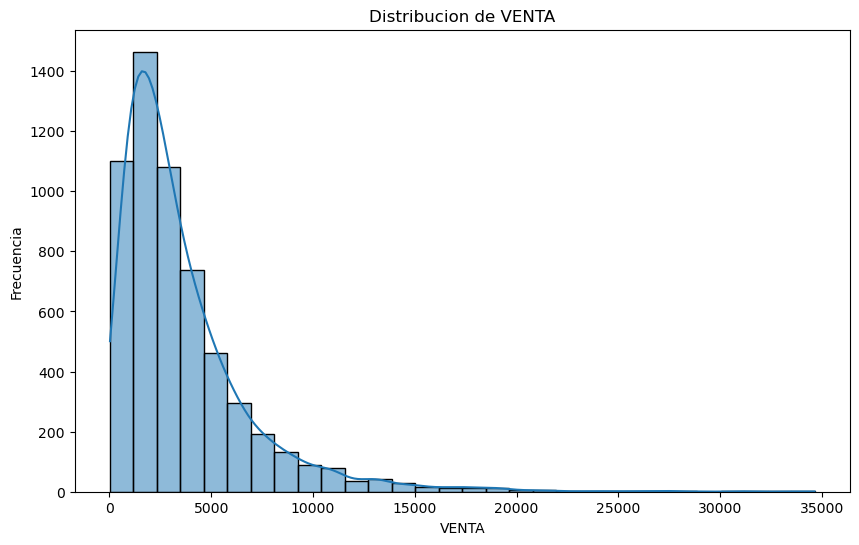

<Figure size 1000x600 with 0 Axes>

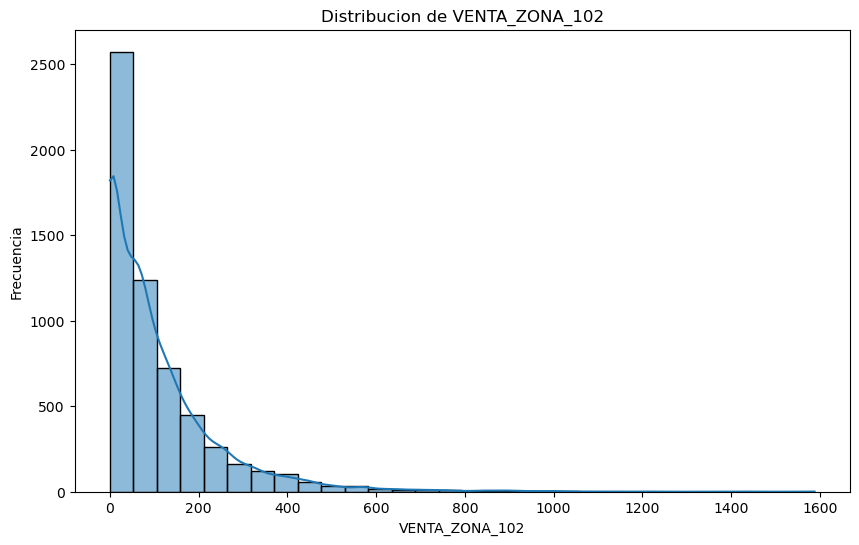

<Figure size 1000x600 with 0 Axes>

In [6]:
# Paso 3: Analisis Univariado
#Analisis variables numericas
from analisis.funciones import univariadonumerico,univariadocategorico,bivariatecategoricalvsnumerical,bivariatenumericasvsnumerical,multivarado
univariadonumerico(df,"VENTA")
univariadonumerico(df,"VENTA_ZONA_102")

### **Variables categoricas**

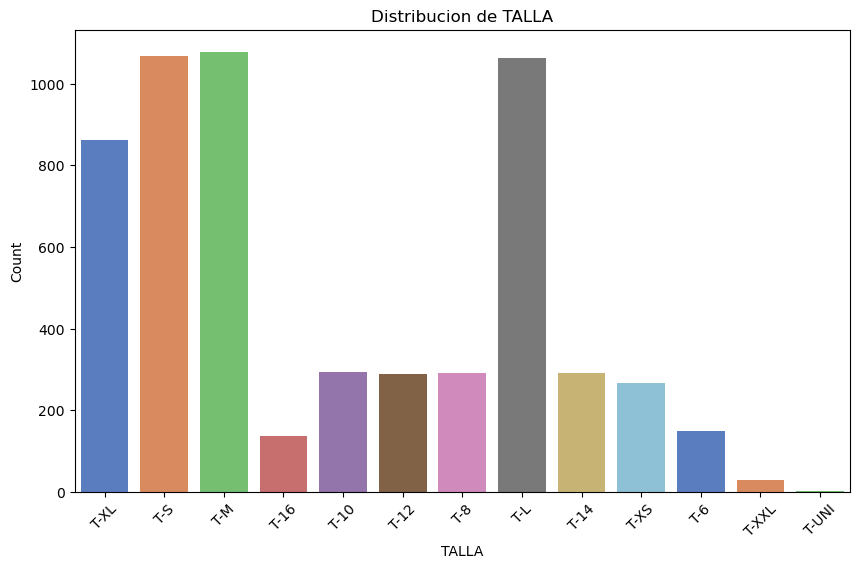

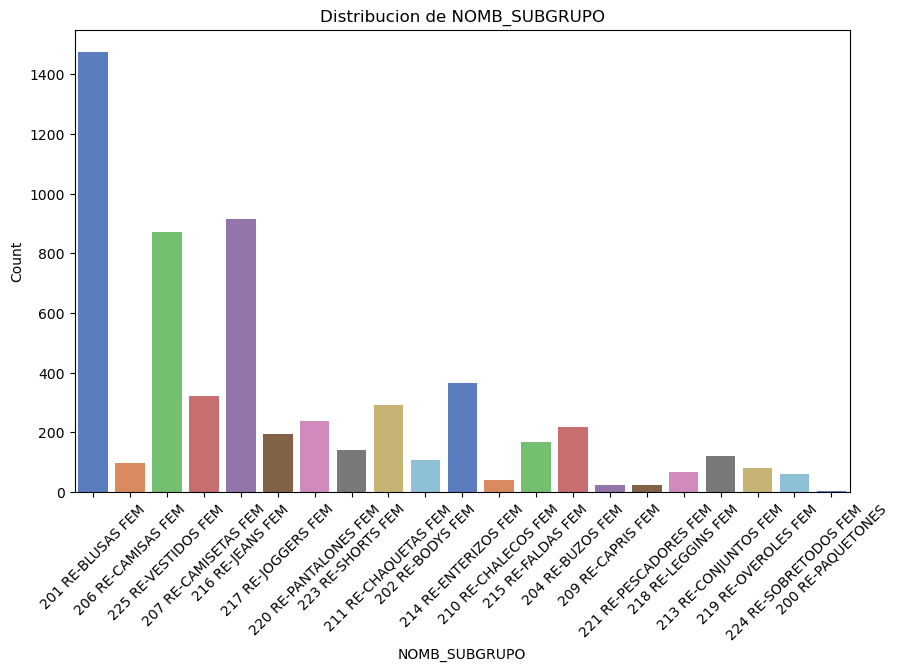

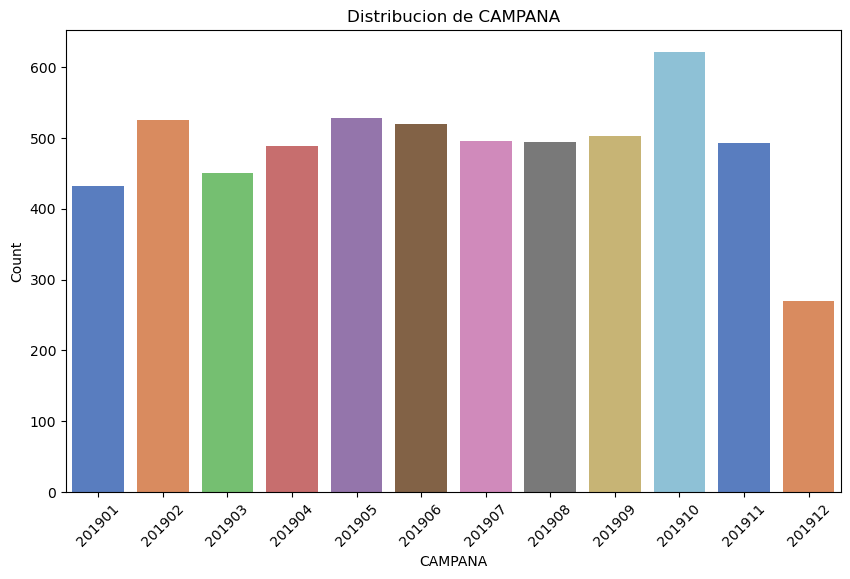

In [7]:
# Analisis de variables categoricas
univariadocategorico(df,"TALLA")
univariadocategorico(df,"NOMB_SUBGRUPO")
univariadocategorico(df,"CAMPANA")

## **Paso 4: Análisis bivariado**

### **Relación entre una variable numerica y una variable categorica**

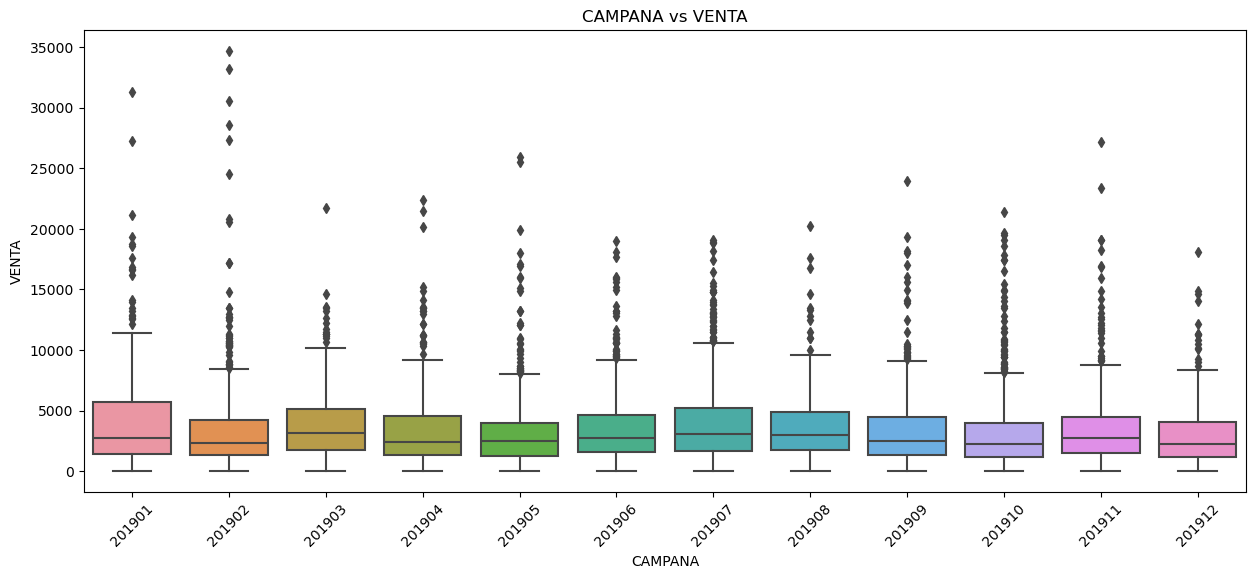

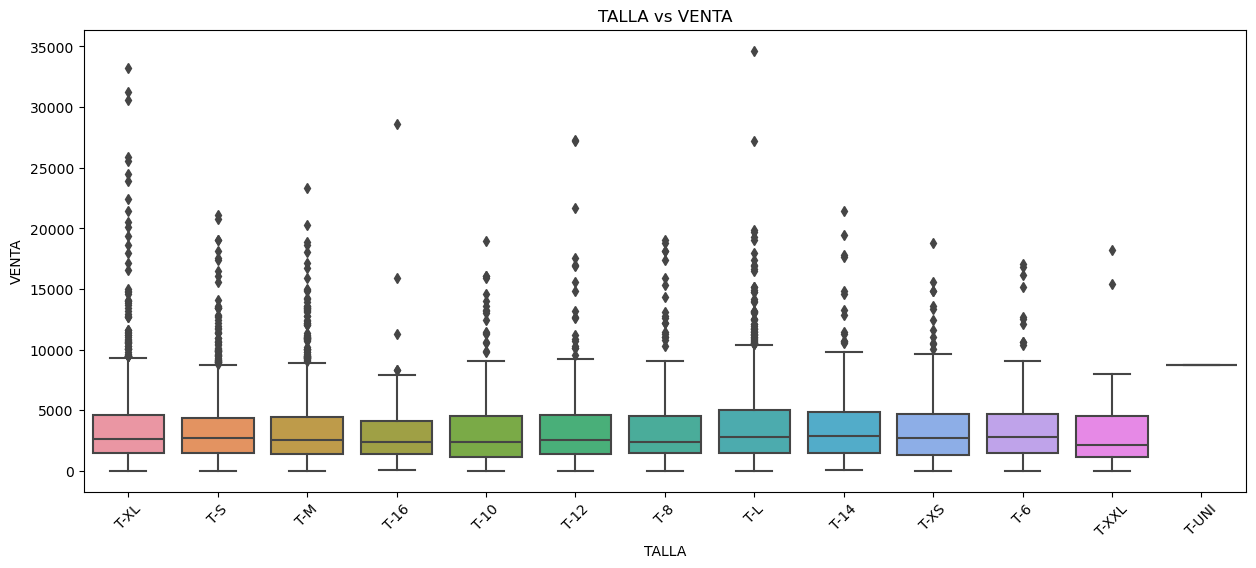

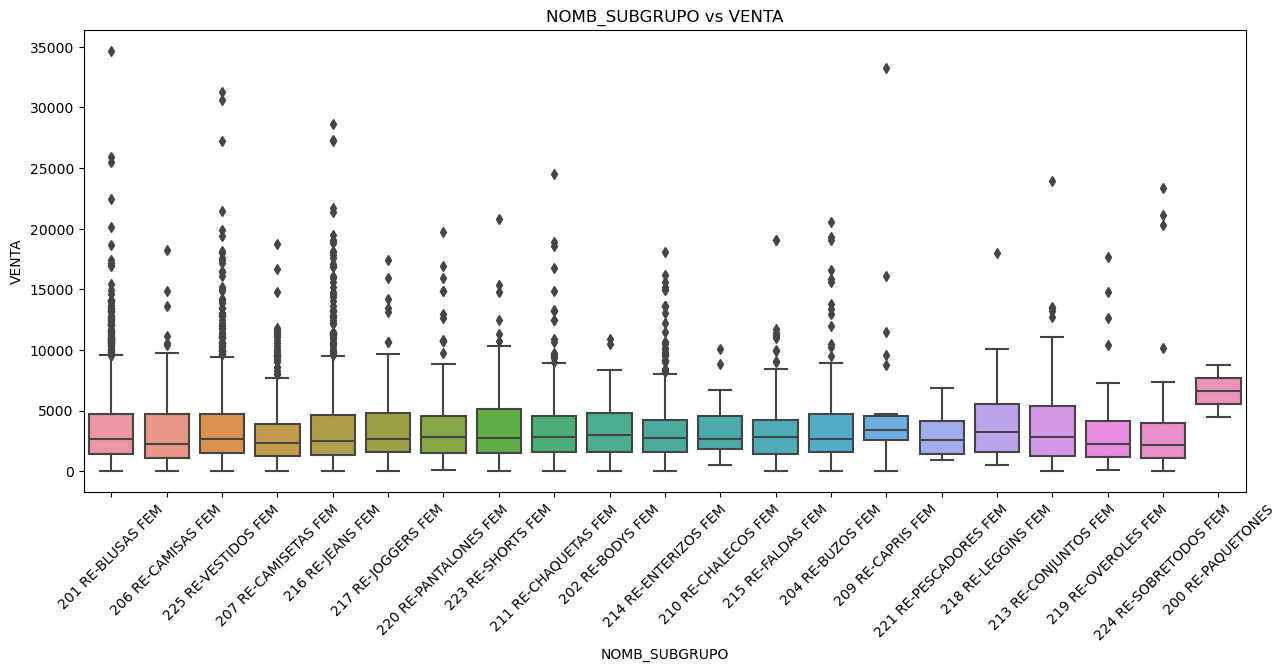

In [8]:
# Paso 4: Analisis bivariado
# Relacion entre una variable numerica y una variable categorica


bivariatecategoricalvsnumerical(df,'CAMPANA','VENTA')

bivariatecategoricalvsnumerical(df,'TALLA','VENTA')
bivariatecategoricalvsnumerical(df,'NOMB_SUBGRUPO','VENTA')

### **Relación entre dos variables numericas**

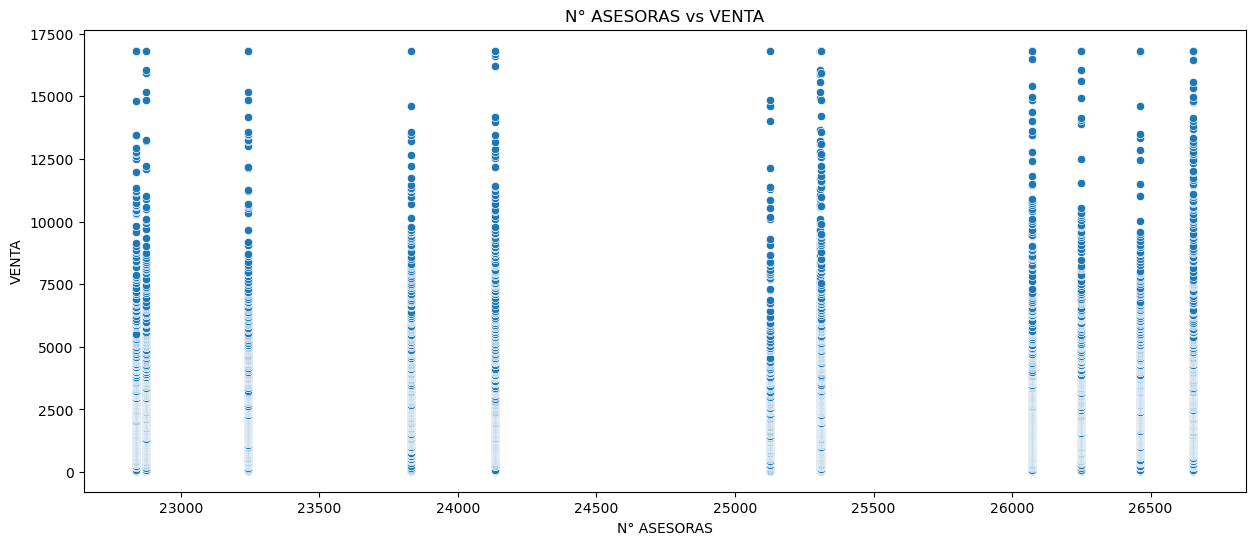

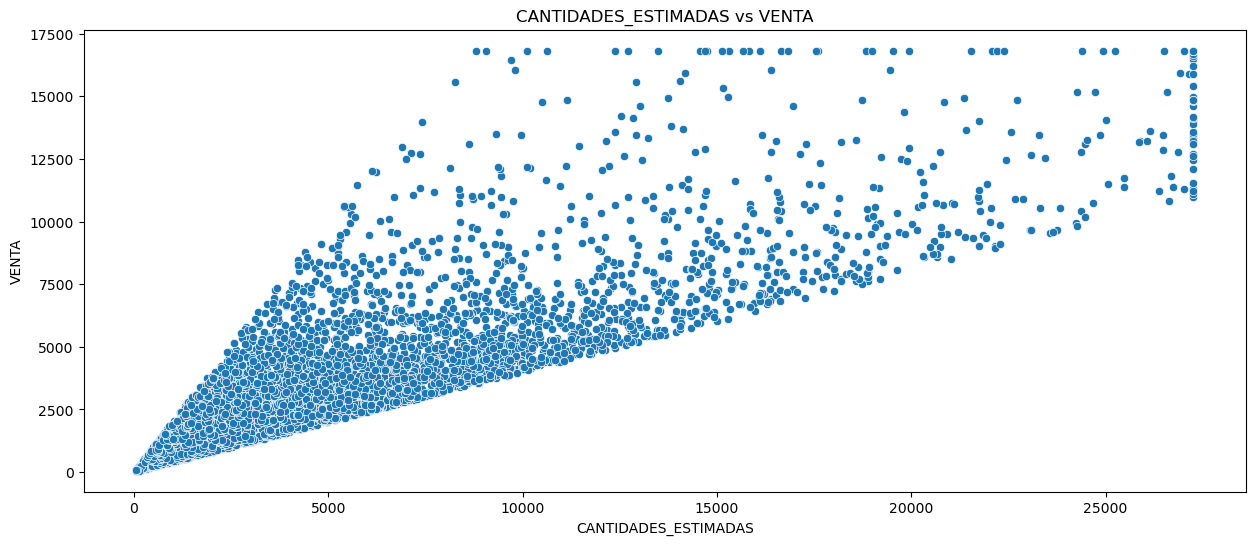

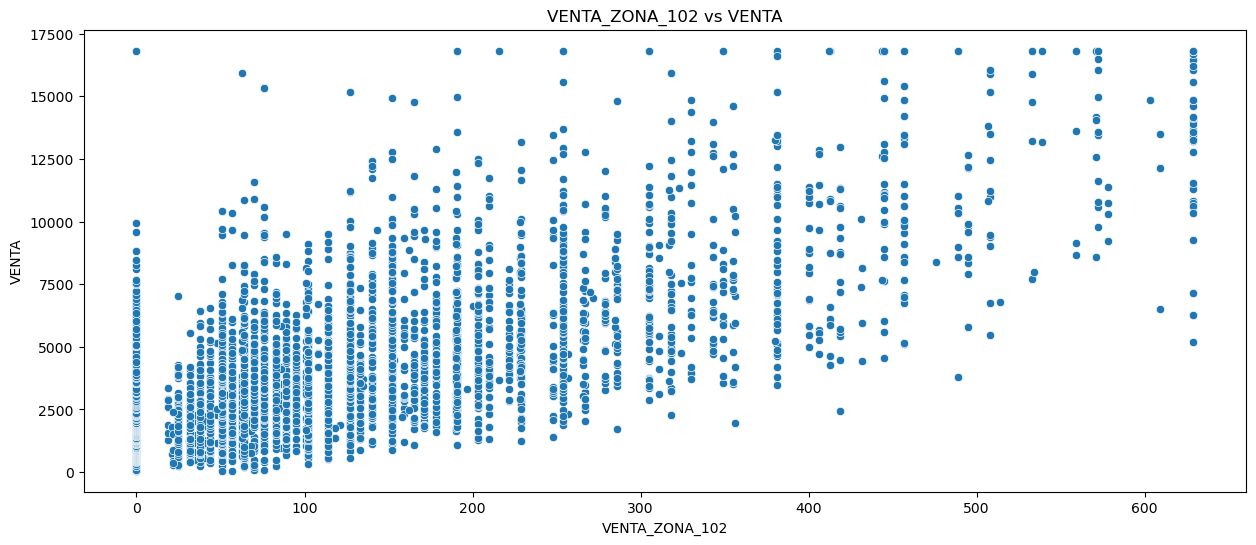

In [41]:
# Relacion entre dos variables numericas


bivariatenumericasvsnumerical(df,"N° ASESORAS","VENTA")
bivariatenumericasvsnumerical(df,"CANTIDADES_ESTIMADAS","VENTA")
bivariatenumericasvsnumerical(df,"VENTA_ZONA_102","VENTA")


### **Análisis del Paso 3 y Paso 4**

#### **Paso 3: Análisis Univariado**

1. **Distribución de Ventas (Variable Numérica)**:
   - **Insight**: La distribución de `VENTA` está fuertemente sesgada a la izquierda, con la mayoría de las ventas entre 0 y 7000. La mayor frecuencia se encuentra alrededor de los 2000.
   - **Implicación**: Este sesgo sugiere que la mayoría de las ventas son bajas, mientras que hay algunas ventas muy altas que generan una cola larga a la derecha. Esto podría requerir una transformación logarítmica para normalizar la distribución y mejorar el modelado.
2. **Distribución de Ventas_zona_102 (Variable Numérica)**:
   - **Insight**: La distribución de `VENTA_ZONA_102` está fuertemente sesgada a la izquierda, con la mayoría de las ventas entre 0 y 200. La mayor frecuencia se encuentra alrededor de los 50.
   - **Implicación**: Este sesgo, como el de la variable target `VENTA`sugiere que la mayoría de las ventas son bajas, mientras que hay algunas ventas muy altas que generan una cola larga a la derecha. Lo que, podria indicar la no necesidad de una normalizacion(ni para `VENTA`, ni para `VENTAS_ZONA_10#`), siendo las variables por zona variables potencialmente predictivas. 
3. **Distribución de TALLA (Variable Categórica)**:
   - **Insight**: La variable `TALLA` presenta una distribución variada, con `T-M` como la más común, seguida de `T-S` y `T-L`. Algunas tallas tienen muy pocas ventas.
   - **Implicación**: La alta frecuencia de ciertas tallas indica que pueden influir significativamente en las ventas. Las tallas con menos observaciones podrían requerir un manejo especial para evitar el sobreajuste, utilizando técnicas como codificación por frecuencia o agrupación de categorías similares.

4. **Distribución de CAMPANA (Variable Categórica)**:
   - **Insight**: La variable `CAMPANA` muestra una distribución uniforme, con `201912` como la campaña con menor cantidad de productos.
   - **Implicación**: La cantidad de productos en cada campaña parece mantenerse estable, pero la baja cantidad en `201912` podría requerir un manejo especial para evitar sesgos en el modelo.

5. **Distribución de NOMB_SUBGRUPO (Variable Categórica)**:
   - **Insight**: La variable `NOMB_SUBGRUPO` tiene una distribución variada, con `201 RE-BLUSAS FEM` como el grupo más común, seguido de `216 RE-JEANS FEM` y `225 RE-VESTIDOS FEM`.
   - **Implicación**: La alta frecuencia de ciertos subgrupos indica que pueden ser determinantes en las ventas. Subgrupos con pocas observaciones podrían necesitar ser agrupados para evitar problemas de sobreajuste en el modelo.

#### **Paso 4: Análisis Bivariado**

1. **Relación entre CAMPANA y VENTA (Categórica vs. Numérica)**:
   - **Insight**: No se observa una relación clara entre `VENTA` y `CAMPANA`.
   - **Implicación**: Parece que la cantidad de productos en cada campaña no influye directamente en las ventas. 

2. **Relación entre TALLA y VENTA (Categórica vs. Numérica)**:
   - **Insight**: No se observa una relación clara entre `VENTA` y `TALLA`.
   - **Implicación**: La talla de los productos no parece afectar directamente las ventas, Sin embargo, la gran cantidad de valores atípicos indica que deberán manejarse cuidadosamente para evitar el sobreajuste.
   - **Insight**: No se observa una relación clara entre `VENTA` y `NOMB_SUBGRUPO`.
   - **Implicación**: La cantidad de productos en cada subgrupo no parece influir directamente en las ventas, pero la presencia de valores atípicos indica que deben tratarse con cuidado.
4. **Relación entre VENTA y Ventas_Zona_102 (Numérica vs. Numérica)**:
   - **Insight**: Existe una relacion entre `VENTA` y `VENTAS_ZONA_102`.
   - **Implicación**: Las variables de venta por zona son potencialmete variables predictoras.
3. **Relación entre VENTA y CANTIDADES_ESTIMADAS (Numérica vs. Numérica)**:
   - **Insight**: Existe una fuerte correlación positiva entre `VENTA` y `CANTIDADES_ESTIMADAS`.
   - **Implicación**: Esta relación lineal indica que las estimaciones realizadas por el área de mercadeo son de alguna u otra manera acordes.
4. **Relación entre VENTA y N° ASESORAS (Numérica vs. Numérica)**:
   - **Insight**: No Existe una relacion entre `VENTA` y `CANTIDADES_ESTIMADAS`.
   - **Implicación**: El numero de asesoras podriar ser omitido del modelo.

### **Resumen**:
- **Predictores Clave**: Las `Ventas por zona` tienen indicaciones de ser predictores clave, por otro lado, en las variables categoricas,no hay indicios de predictores clave, pues las visualizaciones sugieren que la frecuencia de las variables categoricas afecte las ventas y por ende, el modelo. 
- **Distribución de Datos**: La asimetría en `VENTA` y `VENTA_ZONA_102` indica que puede no ser necesario la normalizacion de los datos.
- **Valores Atípicos**: Se identificaron valores atípicos en varias relaciones, los cuales deben analizarse detalladamente, ya que podrían representar situaciones especiales que sesguen el modelo si no se manejan correctamente.


## **Paso 5: Análisis multivariado**

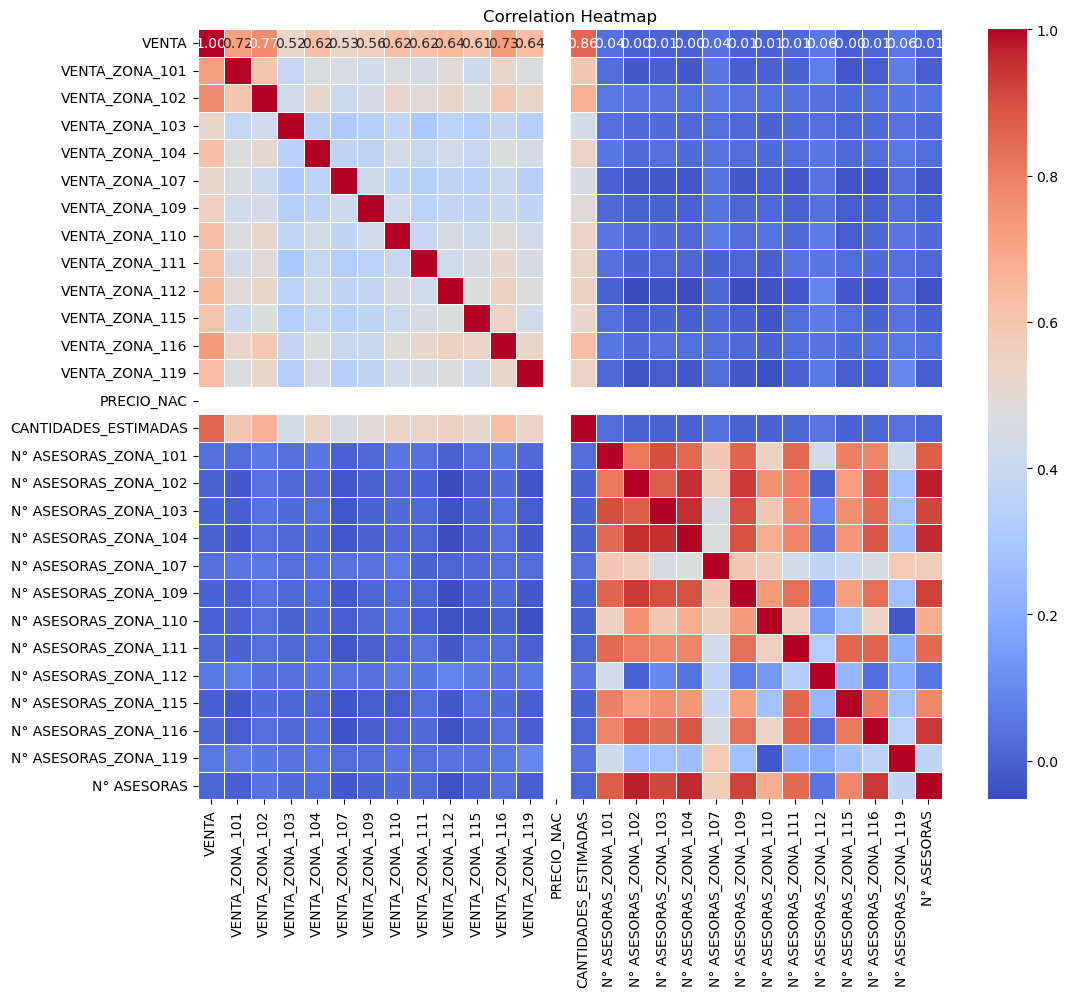

In [10]:
#PASO 5: Analisis multivariado

dfc=df[['VENTA', 'VENTA_ZONA_101',
       'VENTA_ZONA_102', 'VENTA_ZONA_103', 'VENTA_ZONA_104', 'VENTA_ZONA_107',
       'VENTA_ZONA_109', 'VENTA_ZONA_110', 'VENTA_ZONA_111', 'VENTA_ZONA_112',
       'VENTA_ZONA_115', 'VENTA_ZONA_116', 'VENTA_ZONA_119',
       'PRECIO_NAC', 'CANTIDADES_ESTIMADAS', 'N° ASESORAS_ZONA_101',
       'N° ASESORAS_ZONA_102', 'N° ASESORAS_ZONA_103', 'N° ASESORAS_ZONA_104',
       'N° ASESORAS_ZONA_107', 'N° ASESORAS_ZONA_109', 'N° ASESORAS_ZONA_110',
       'N° ASESORAS_ZONA_111', 'N° ASESORAS_ZONA_112', 'N° ASESORAS_ZONA_115',
       'N° ASESORAS_ZONA_116', 'N° ASESORAS_ZONA_119', 'N° ASESORAS']]
multivarado(dfc)

## **Análisis Paso 5**
### **Paso 5: Analisis multivariado**
#### **Mapa de Correlación:**

1. **Ventas y ventas por zona**:

- **Perspectiva**: La correlación más alta observada es entre `Ventas` y `Ventas_zona#` estando entre 0.5-0.80. Esta fuerte correlación sugiere a las ventas por zona como las variable predictiva mas importantes.

- **Implicación**: Debe considerarse las ventas por zona como predictores claves del modelo. La alta correlación sugiere que esta característica explica una parte sustancial de las ventas.

2. **Demas variables**:

- **Perspectiva**:No existe una correlacion importante entre las `Ventas` y las demas variables
- **Implicación**: Debe considerarse si se tendran en cuenta en el modelo o no.

## **Problemas a Resolver:**
1. **Manejo de ouliers**:

- **Problema**: Los diagramas indican una alta la presencia de valores atípicos.

- **Acción**: Identificar y analizar los valores atípicos para determinar si deben eliminarse o si el modelo debe ajustarse para considerarlos.

2. **Ingeniería de Características**:

- **Problema**: Características como `TALLA`,`NOMB_SUBGRUPO`,`CAMPANA` podrían beneficiarse de un tratamiento específico
- **Acción**: Transformar `CAMPANA` a una varible categorica,crear nuevas variables a partir de `TALLA`,`NOMB_SUBGRUPO`,`CAMPANA` y realizar transformaciones a los valores categoricos mediante one-hot-coding



# **Manejo de outliers**

In [11]:
from outliers import outliers,handleoutliers
df["CAMPANA"]=df["CAMPANA"].astype(str)
df_numeric=df.select_dtypes(include=[int,float])
outliers=outliers(df_numeric,"z-score")
df_numeric_cleaned=handleoutliers(df_numeric,"cap",outliers)

# Reemplazar las columnas numéricas con las limpiadas y mantener las no numéricas intactas
df[df_numeric.columns] = df_numeric_cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CAMPANA               5817 non-null   object 
 1   CODIGO_DEL_PRODUCTO   5817 non-null   object 
 2   VENTA                 5817 non-null   float64
 3   VENTA_ZONA_101        5817 non-null   int64  
 4   VENTA_ZONA_102        5817 non-null   int64  
 5   VENTA_ZONA_103        5817 non-null   int64  
 6   VENTA_ZONA_104        5817 non-null   int64  
 7   VENTA_ZONA_107        5817 non-null   float64
 8   VENTA_ZONA_109        5817 non-null   int64  
 9   VENTA_ZONA_110        5817 non-null   int64  
 10  VENTA_ZONA_111        5817 non-null   int64  
 11  VENTA_ZONA_112        5817 non-null   int64  
 12  VENTA_ZONA_115        5817 non-null   float64
 13  VENTA_ZONA_116        5817 non-null   int64  
 14  VENTA_ZONA_119        5817 non-null   int64  
 15  NOMB_SUBGRUPO        

# **Feature Engineer**
## **Creacion de nuevas variables**

In [12]:
from feature_enginner import talla,ropa,trimestres,onehotencoding
df["CAMPANA"]=df["CAMPANA"].astype(str)


df['TALLA_CAT']=df["TALLA"].apply(lambda x: talla(x))
df["CAMPANA_CAT"]=df['CAMPANA'].apply(lambda x: trimestres(x))
df["ROPA_CAT"]=df['NOMB_SUBGRUPO'].apply(lambda x: ropa(x))

## **ONE-HOT-ENCODING**

In [13]:

from feature_enginner import onehotencoding

dfc=df[['CODIGO_DEL_PRODUCTO','VENTA', 'VENTA_ZONA_101',
       'VENTA_ZONA_102', 'VENTA_ZONA_103', 'VENTA_ZONA_104', 'VENTA_ZONA_107',
       'VENTA_ZONA_109', 'VENTA_ZONA_110', 'VENTA_ZONA_111', 'VENTA_ZONA_112',
       'VENTA_ZONA_115', 'VENTA_ZONA_116', 'VENTA_ZONA_119','TALLA','NOMB_SUBGRUPO','CAMPANA','TALLA_CAT','CAMPANA_CAT','ROPA_CAT']]


#Categoria_talla','Trimestres','Ropa'
features=['CAMPANA_CAT','ROPA_CAT','TALLA_CAT']
dfe=onehotencoding(dfc,features)
dfe.head(15)


,CODIGO_DEL_PRODUCTO,VENTA,VENTA_ZONA_101,VENTA_ZONA_102,VENTA_ZONA_103,VENTA_ZONA_104,VENTA_ZONA_107,VENTA_ZONA_109,VENTA_ZONA_110,VENTA_ZONA_111,VENTA_ZONA_112,VENTA_ZONA_115,VENTA_ZONA_116,VENTA_ZONA_119,TALLA,NOMB_SUBGRUPO,CAMPANA,CAMPANA_CAT_Cuarto_trimestre,CAMPANA_CAT_Primer_trimestre,CAMPANA_CAT_Segundo_trimestre,CAMPANA_CAT_Tercer_trimestre,ROPA_CAT_Conjuntos y otros,ROPA_CAT_Ropa_inferior,ROPA_CAT_Ropa_superior,TALLA_CAT_Grande,TALLA_CAT_Mediana,TALLA_CAT_Pequeña
0,P00845,51.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,T-XL,201 RE-BLUSAS FEM,201902,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,P00640,51.0,0,0,0,0,0.0,0,32,0,0,0.0,0,0,T-S,206 RE-CAMISAS FEM,201902,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,P00667,51.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,T-S,201 RE-BLUSAS FEM,201902,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,P00708,51.0,0,0,0,0,0.0,0,0,0,0,44.0,0,0,T-M,225 RE-VESTIDOS FEM,201902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,P00938,51.0,0,0,0,0,0.0,0,0,0,51,0.0,0,0,T-M,207 RE-CAMISETAS FEM,201902,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,P00755,51.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,T-16,216 RE-JEANS FEM,201902,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,P00713,64.0,0,0,0,0,0.0,0,0,0,0,64.0,0,0,T-M,201 RE-BLUSAS FEM,201902,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,P00606,64.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,T-XL,217 RE-JOGGERS FEM,201902,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,P00825,64.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,T-10,220 RE-PANTALONES FEM,201902,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,P00724,64.0,64,0,0,0,0.0,0,0,0,0,0.0,0,0,T-M,225 RE-VESTIDOS FEM,201902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<Figure size 1200x1000 with 0 Axes>

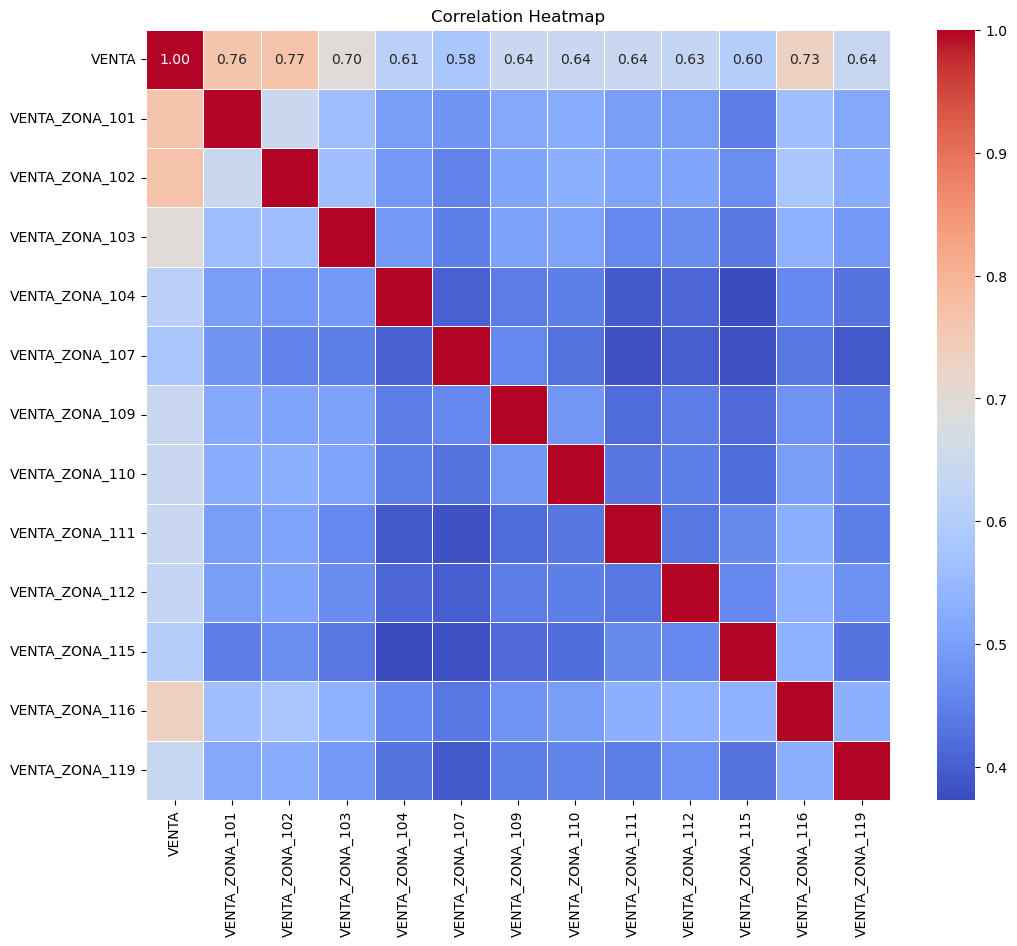

In [14]:
plt.figure(figsize=(12, 10))

dfc=df[['VENTA', 'VENTA_ZONA_101',
       'VENTA_ZONA_102', 'VENTA_ZONA_103', 'VENTA_ZONA_104', 'VENTA_ZONA_107',
       'VENTA_ZONA_109', 'VENTA_ZONA_110', 'VENTA_ZONA_111', 'VENTA_ZONA_112',
       'VENTA_ZONA_115', 'VENTA_ZONA_116', 'VENTA_ZONA_119']]


multivarado(dfc)

In [15]:
dfe.to_csv('Datosmodelo.csv',index=False)

# **MODELOS**
## **XGBO0ST**
### **XGBOOST: y_test vs y_pred**



MAE (validación cruzada): 855.2632421876108
RMSE (validación cruzada): 1249.9818391537717
MAE: 819.4595719018263
R² Score: 0.85871006710878
RMSE: 1156.3187
std: 3077.574537234031


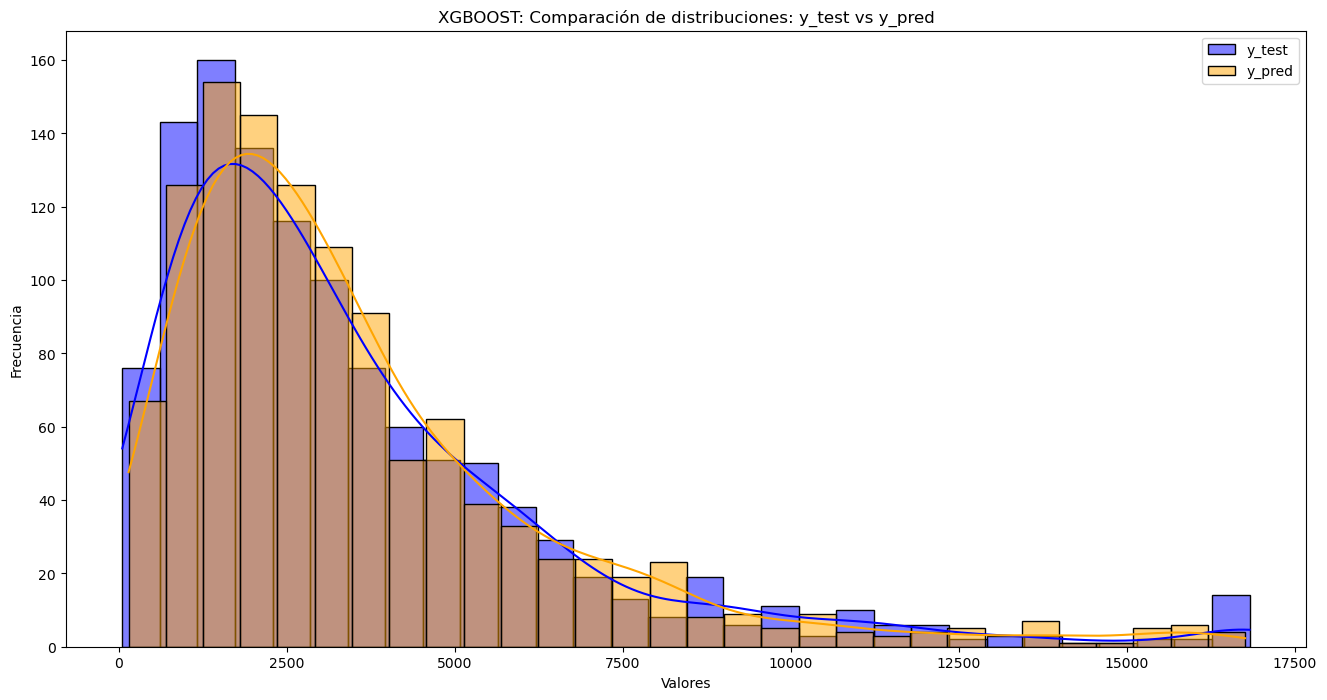

In [ ]:
from modelos import xgb
from evaluaciones import evaluaciones
from analisis.funciones import visualizacionmodelo
import numpy as np
# Define the model hyperparameters
params = {
        "objective": "reg:squarederror",  # Para regresión con MSE
        "learning_rate": 0.05,
        "n_estimators": 600,
        "max_depth": 5,
        "min_child_weight": 1,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "eval_metric": "rmse",  # Métrica de evaluación durante el entrenamiento
        "random_state": 8888,
    }
modelo,X_train, X_test, y_train, y_test,X,y=xgb(dfe,params)
y_pred = modelo.predict(X_test)
cv_scores,cv_rmse,mae,rmse,r2=evaluaciones(modelo,X,y,y_pred,y_test)
print(f"MAE (validación cruzada): {-np.mean(cv_scores)}")
print(f"RMSE (validación cruzada): {-np.mean(cv_rmse)}")                                 
print(f"MAE: {mae}")
print(f"R² Score: {r2}")
print(f'RMSE: {rmse:.4f}')
print("std:",y_test.std())

visualizacionmodelo(y_test,y_pred,"XGBOOST: Comparación de distribuciones: y_test vs y_pred")


### **XGBOOST: Cantidades Estimadas Modelo Vs Cantidades Estimadas Mercadeo**

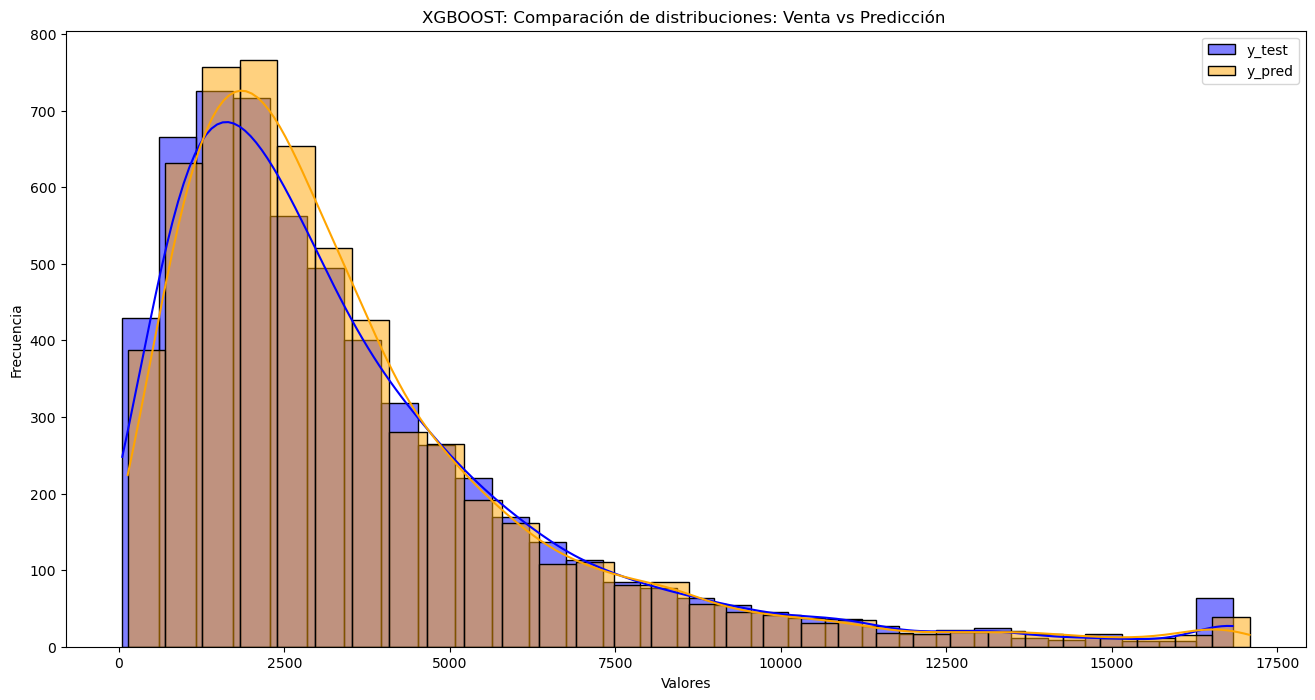

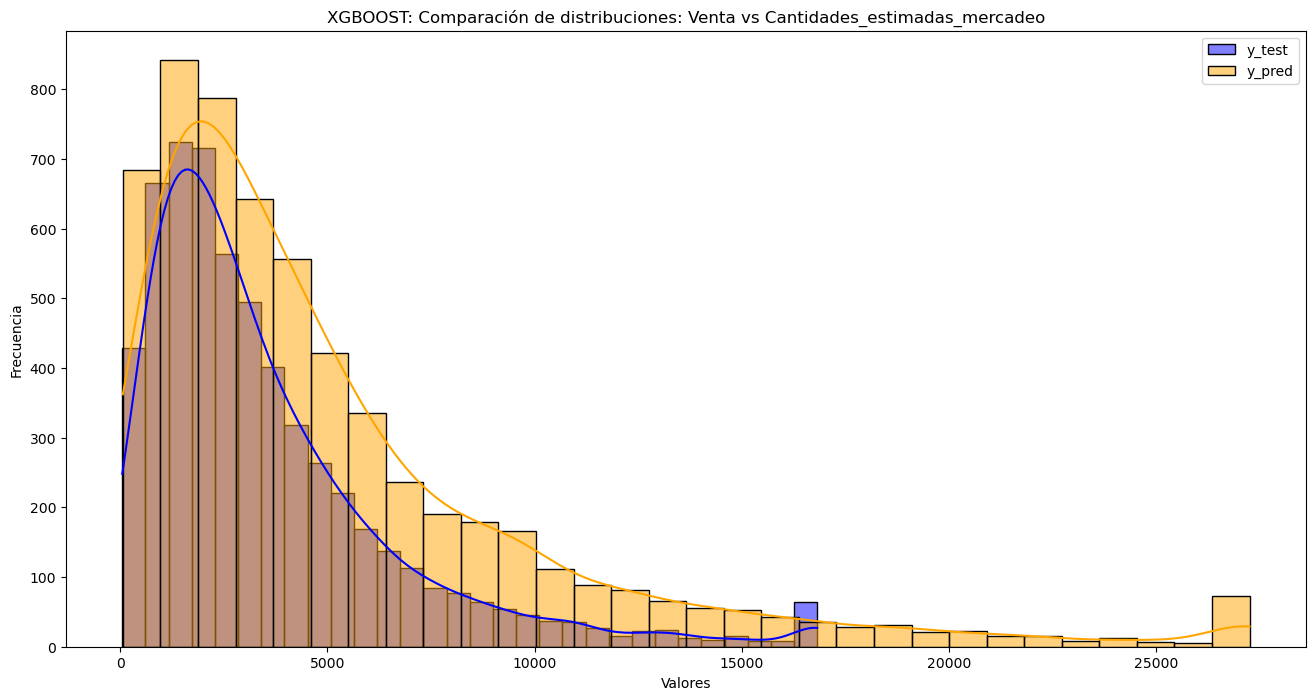

In [ ]:
y_pred_all = modelo.predict(X) 
y_test=df['VENTA']
visualizacionmodelo(y_test,y_pred_all,"XGBOOST: Comparación de distribuciones: Venta vs Cantidades Estimadas Modelo ")
y_pred =df['CANTIDADES_ESTIMADAS']
y_test=df['VENTA']
visualizacionmodelo(y_test,y_pred,"Comparación de distribuciones: Venta vs Cantidades Estimadas Mercadeo")

## **RANDOM FOREST**
### **RANDOM FOREST: y_test vs y_pred**

MAE (validación cruzada): 852.9783363993092
RMSE (validación cruzada): 1243.2233413920192
MAE: 828.1512508188175
R² Score: 0.8582128340526878
RMSE: 1158.3516
std: 3077.574537234031


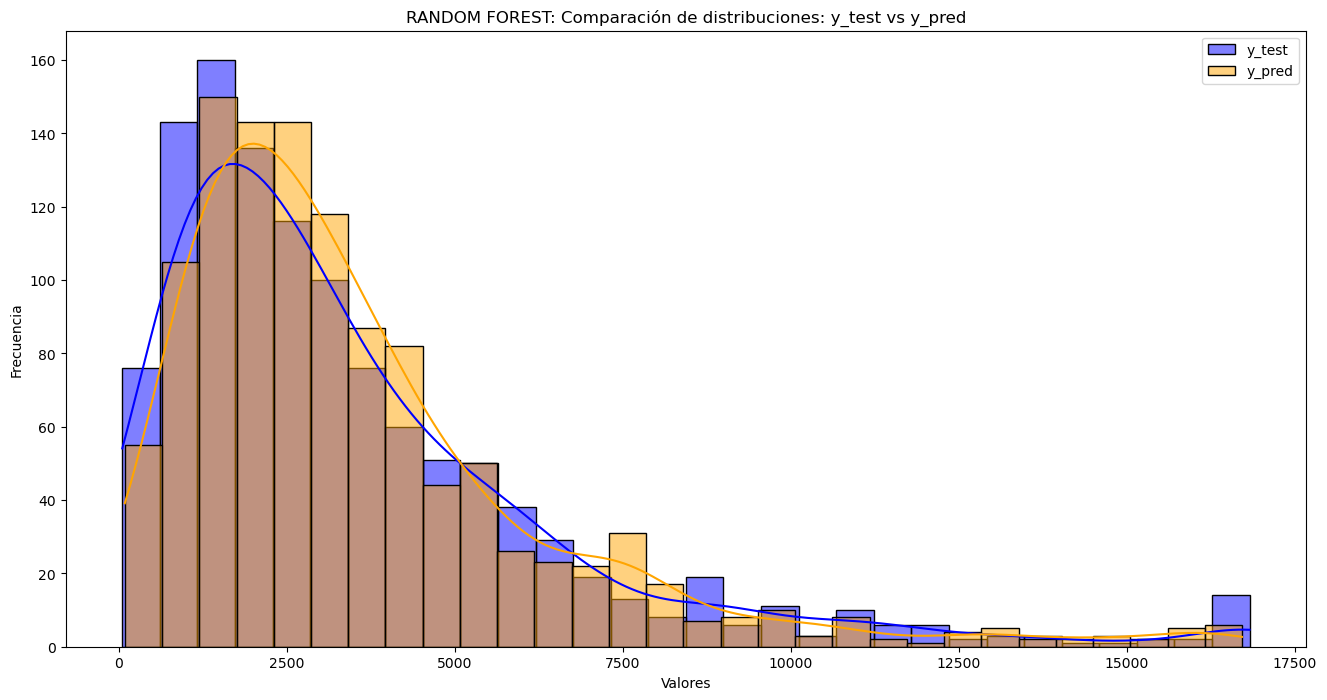

In [37]:
from modelos import random_forest

params = {
        "n_estimators": 100,  # Número de árboles en el bosque. El valor por defecto es 100.
        "max_depth": None,  # Profundidad máxima de los árboles. Por defecto es None (sin límite).
        "min_samples_split": 2,  # Número mínimo de muestras para dividir un nodo. Por defecto es 2.
        "min_samples_leaf": 1,  # Número mínimo de muestras en un nodo hoja. Por defecto es 1. # Número máximo de características a considerar para dividir un nodo. Por defecto es 'auto'.
        "bootstrap": True,  # Si se usan muestras bootstrap (con reemplazo). Por defecto es True.
        "oob_score": False,  # Si se calcula la puntuación fuera de la bolsa (out-of-bag). Por defecto es False.
        "n_jobs": 1,  # Número de trabajos (hilos) a usar para el procesamiento paralelo. Por defecto es 1.
        "random_state": 42,  # Semilla del generador aleatorio para reproducibilidad. Por defecto es None.
        "warm_start": False,  # Si se reutilizan los árboles previos para agregar más árboles. Por defecto es False.  # Función de medición de la calidad de la división de los nodos. 'mse' por defecto.
        "max_samples": None,  # Número de muestras para ajustar cada árbol. Por defecto es None.
    }

modelo,X_train, X_test, y_train, y_test,X,y=random_forest(dfe,params)
y_pred = modelo.predict(X_test)
# Hacer predicciones
# Evaluación
cv_scores,cv_rmse,mae,rmse,r2=evaluaciones(modelo,X,y,y_pred,y_test)
print(f"MAE (validación cruzada): {-np.mean(cv_scores)}")
print(f"RMSE (validación cruzada): {-np.mean(cv_rmse)}")                                 
print(f"MAE: {mae}")
print(f"R² Score: {r2}")
print(f'RMSE: {rmse:.4f}')
print("std:",y_test.std())

visualizacionmodelo(y_test,y_pred,"RANDOM FOREST: Comparación de distribuciones: y_test vs y_pred")

### **RANDOMFOREST: Cantidades Estimadas Modelo Vs Cantidades Estimadas Mercadeo**

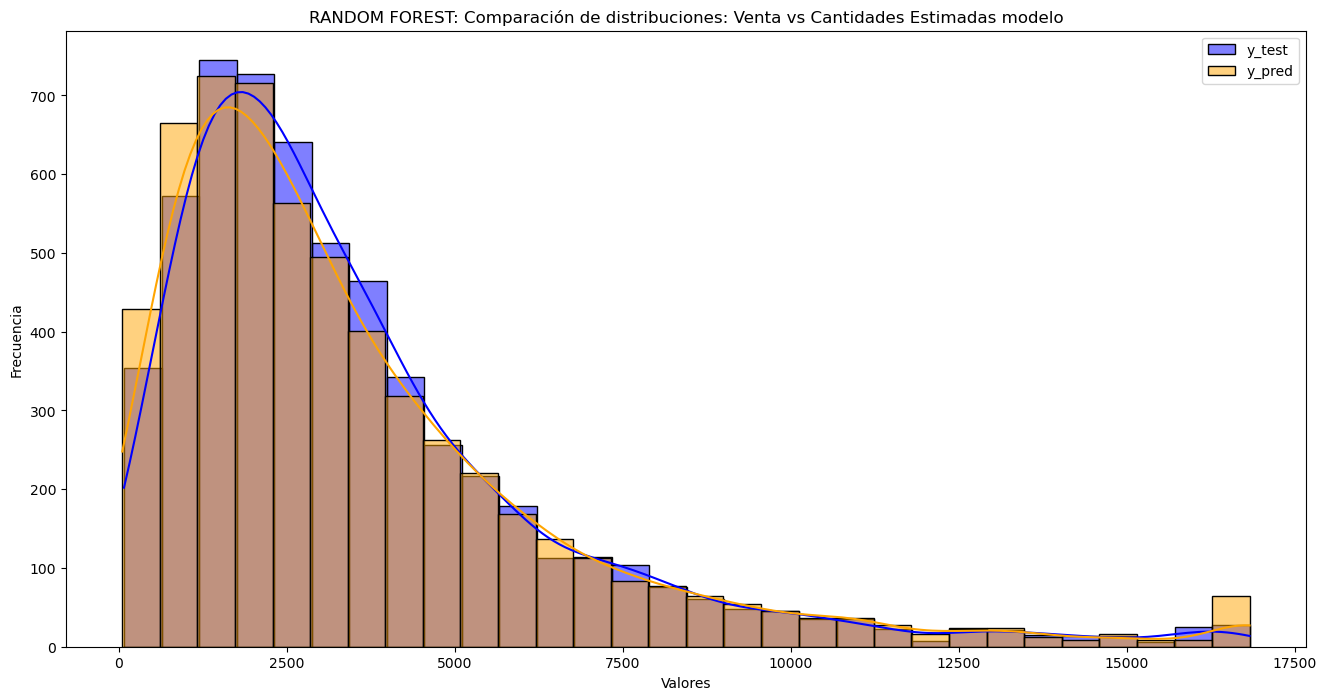

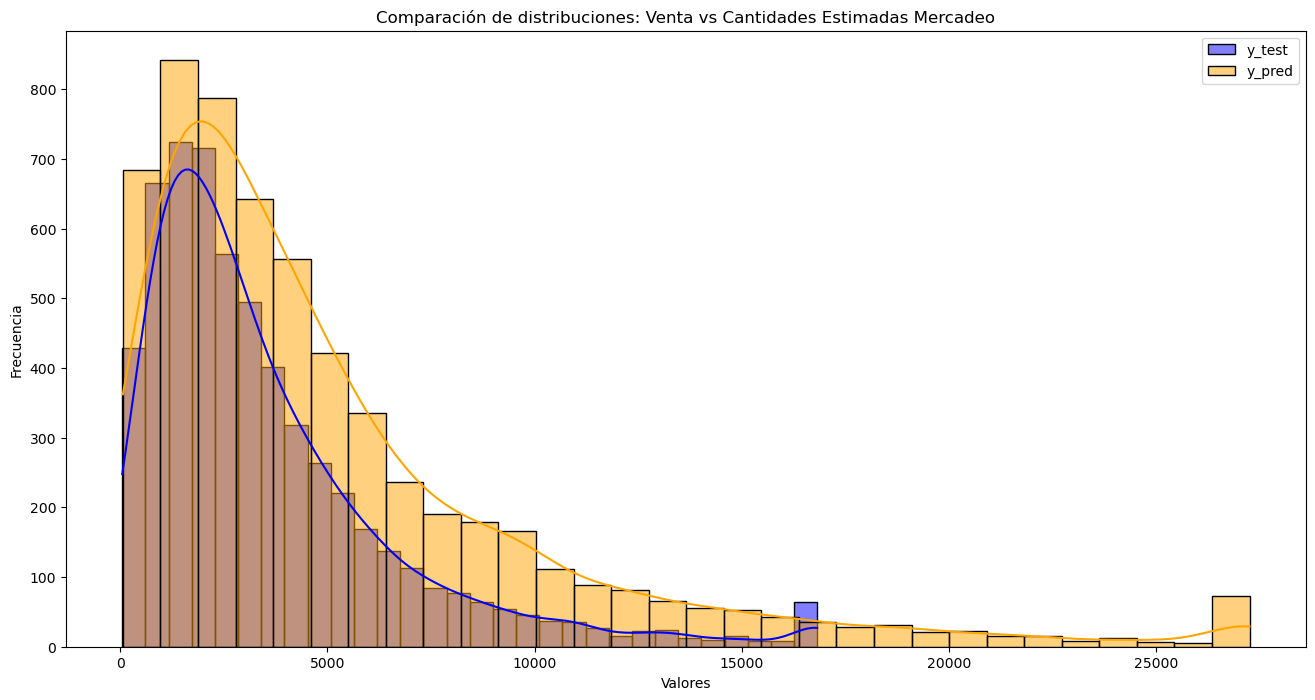

In [38]:
y_pred_all = modelo.predict(X) 
y_test=df['VENTA']
visualizacionmodelo(y_pred_all,y_test,"RANDOM FOREST: Comparación de distribuciones: Venta vs Cantidades Estimadas modelo")
y_pred =df['CANTIDADES_ESTIMADAS']
y_test=df['VENTA']
visualizacionmodelo(y_test,y_pred,"Comparación de distribuciones: Venta vs Cantidades Estimadas Mercadeo")

## **LIGHTGBM**
### **LIGHTGBM: y_test vs y_pred**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 4653, number of used features: 22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3563.842304
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[155]	valid_0's rmse: 1125.61
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

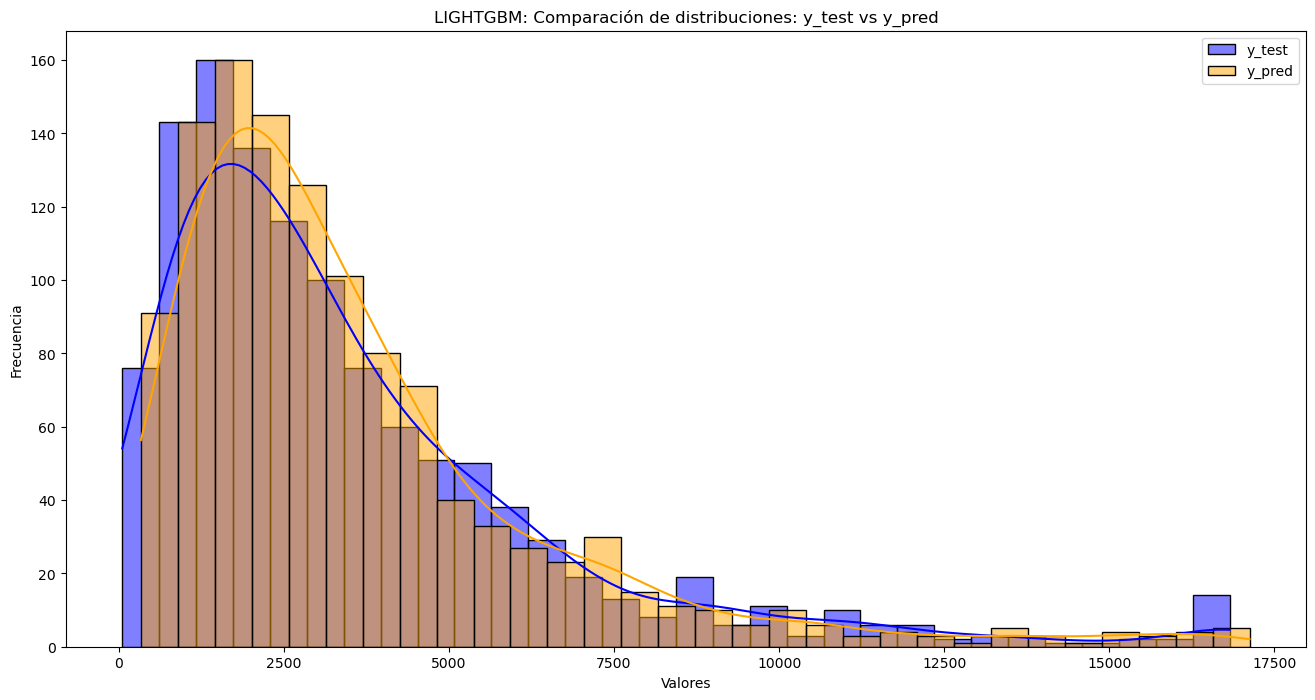

In [39]:
from modelos import lightgbm
#Definir los parámetros para LightGBM
params = {
        'objective': 'regression',  # Tipo de problema (regresión)
        'metric': 'rmse',  # Métrica de evaluación
        'boosting_type': 'gbdt',  # Tipo de boosting
        'num_leaves': 31,  # Número de hojas
        'learning_rate': 0.05,  # Tasa de aprendizaje
        'feature_fraction': 0.9  # Fracción de características a usar
    }
modelo,X_train, X_test, y_train, y_test,X,y,mejor_iteracion,modelo1=lightgbm(dfe,params)

y_pred = modelo1.predict(X_test)
# Hacer predicciones
#y_pred = modelo1.predict(X_test, num_iteration=mejor_iteracion)
# Evaluación
cv_scores,cv_rmse,mae,rmse,r2=evaluaciones(modelo1,X,y,y_pred,y_test)

print(f"MAE (validación cruzada): {-np.mean(cv_scores)}")
print(f"RMSE (validación cruzada): {-np.mean(cv_rmse)}")                                 
print(f"MAE: {mae}")
print(f"R² Score: {r2}")
print(f'RMSE: {rmse:.4f}')
print("std:",y_test.std())

visualizacionmodelo(y_test,y_pred,"LIGHTGBM: Comparación de distribuciones: y_test vs y_pred")

### **LIGHTGBM: Cantidades Estimadas Modelo Vs Cantidades Estimadas Mercadeo**

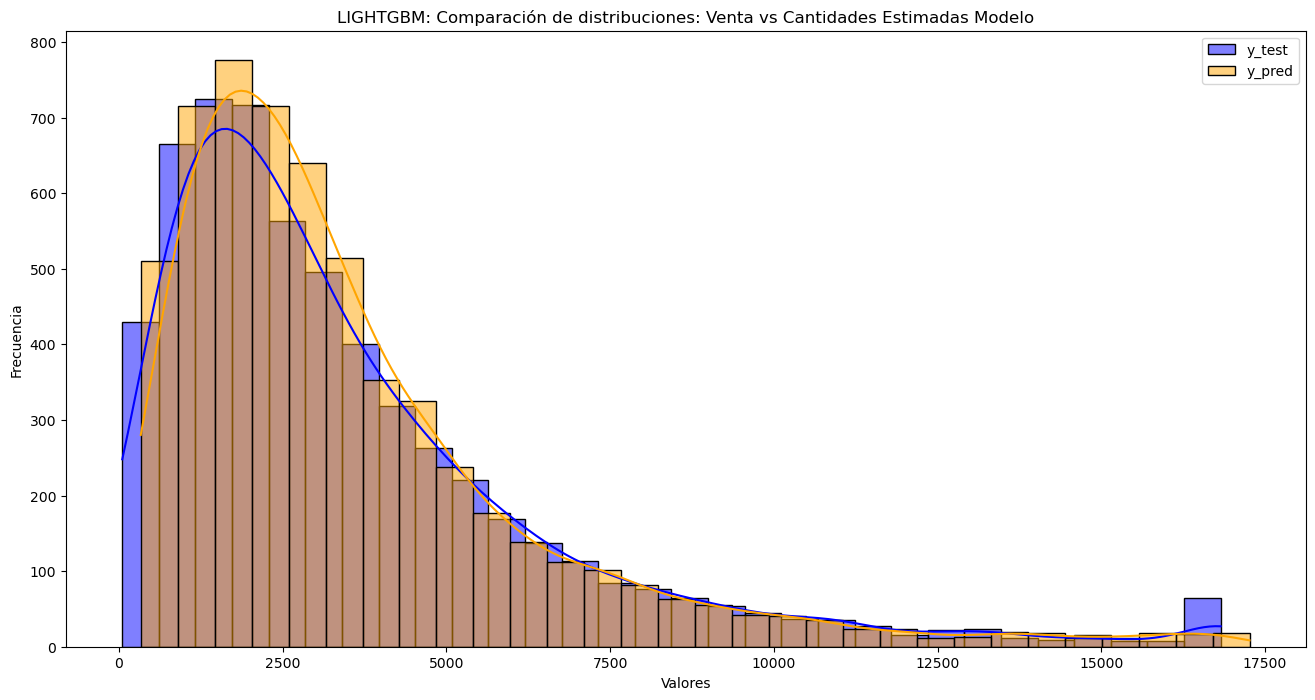

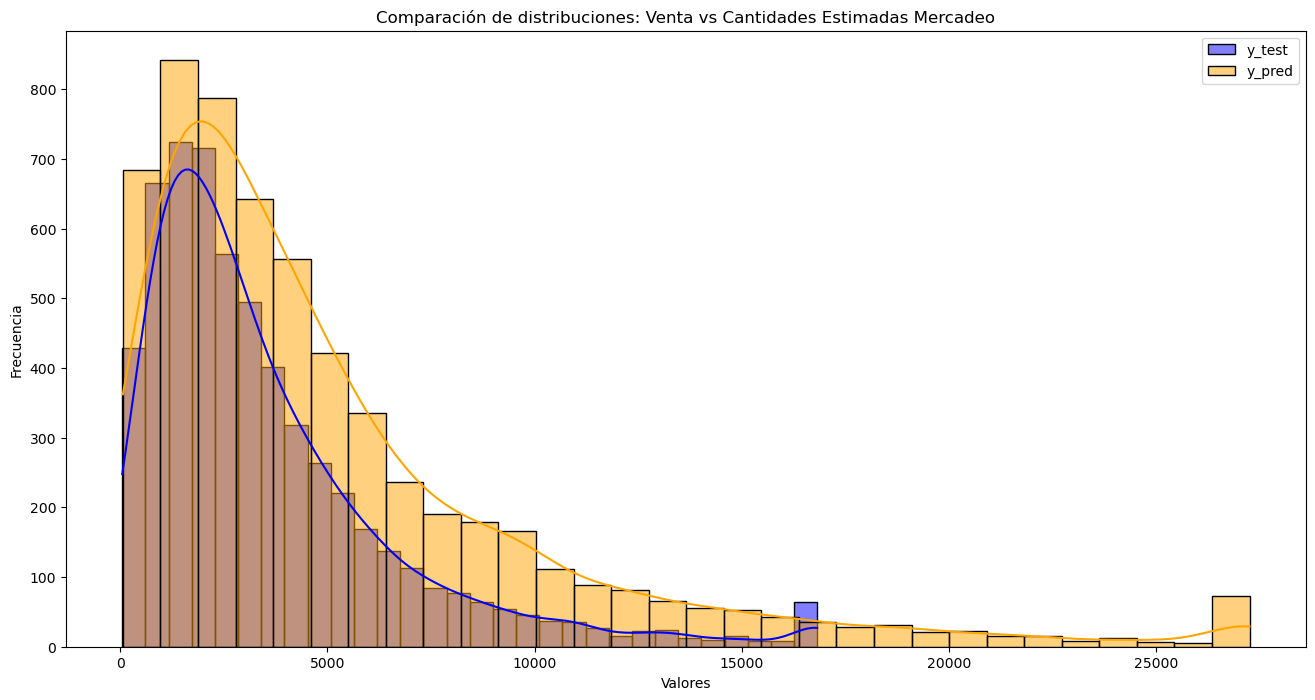

In [40]:
y_pred_all = modelo1.predict(X) 
y_test=df['VENTA']
visualizacionmodelo(y_test,y_pred_all,"LIGHTGBM: Comparación de distribuciones: Venta vs Cantidades Estimadas Modelo")
y_pred =df['CANTIDADES_ESTIMADAS']
y_test=df['VENTA']
visualizacionmodelo(y_test,y_pred,"Comparación de distribuciones: Venta vs Cantidades Estimadas Mercadeo")